# Second-hand Automobile Price Prediction

This dataset consists of three types of entities:

1. its assigned insurance risk rating (symboling),
2. its normalized losses in use as compared to other cars and
3. the specification of an auto in terms of various characteristics.

A value in the symboling column of +3 indicates that the auto is
risky, -3 that it is probably pretty safe. The third factor is the relative average loss payment per insured
vehicle year.

Our objective is to provide potential second-hand car buyers with suitable resale values derived from various
characteristics of the cars.


In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

In [2]:
df =pd.read_csv('automobile.data', header=None)
df.columns = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [3]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

## Pre-processing 

### Data Formatting

In [4]:
df['normalized-losses'].replace('?',np.nan,inplace=True)
df['bore'].replace('?',np.nan,inplace=True)
df['stroke'].replace('?',np.nan,inplace=True)
df['horsepower'].replace('?',np.nan,inplace=True)
df['peak-rpm'].replace('?',np.nan,inplace=True)
df['price'].replace('?',np.nan,inplace=True)

df['normalized-losses'] = df['normalized-losses'].astype('float64')
df['bore'] = df['bore'].astype('float64')
df['stroke'] = df['stroke'].astype('float64')
df['horsepower'] = df['horsepower'].astype('float64')
df['peak-rpm'] = df['peak-rpm'].astype('float64')
df['price'] = df['price'].astype('float64')

We'll also convert variables where numbers are spelled out to numeric format.

In [5]:
def spell_to_numerals(spell):
    return {'zero':0,
    'one':1,    'nine':9,
    'two':2,    'ten':10,
    'three':3,  'eleven':11,
    'four':4,   'twelve':12,
    'five':5,   'thirteen':13,
    'six':6,    'fourteen':14,
    'seven':7,  'forteen':14,
    'eight':8,  'fifteen':15,
    'sixteen':16}[spell.lower()] # We won't need numbers above this.

df['num-of-cylinders'] = df['num-of-cylinders'].apply(spell_to_numerals)
df['num-of-doors'] = df['num-of-doors'].replace('?','zero').apply(spell_to_numerals)

df['num-of-cylinders'] = df['num-of-cylinders'].astype('int')
df['num-of-doors'] = df['num-of-doors'].astype('int')

There are imperial units in this dataset. We'll do better with the metric system.

In [6]:
df["city-mpg"]= 235/df["city-mpg"]
df.rename(columns = {"city-mpg":"city-L/100km"},inplace=True)

In [7]:
df["highway-mpg"]= 235/df["highway-mpg"]
df.rename(columns = {"highway-mpg":"highway-L/100km"},inplace=True)

The engine block size is normally categorised into classes with much variance.

In [8]:
intervals = np.linspace(min(df['engine-size']), max(df['engine-size']),3)
df['block-size'] = pd.cut(df['engine-size'], intervals, labels =  ['small block', 'large block'], include_lowest = True)

### Treating Missing Values

In [9]:
print(df.isnull().sum())

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          0
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-L/100km          0
highway-L/100km       0
price                 4
block-size            0
dtype: int64


In [10]:
df['normalized-losses'].fillna(df['normalized-losses'].mean(), inplace=True)
df.dropna(inplace=True)

In [11]:
df.to_csv("cleaned dataset\\automobile.csv")

##  Exploratory Data Analysis

### Summary and Description

In [12]:
df.describe(include='object')

,make,fuel-type,aspiration,body-style,drive-wheels,engine-location,engine-type,fuel-system
count,195,195,195,195,195,195,195,195
unique,21,2,2,5,3,2,5,7
top,toyota,gas,std,sedan,fwd,front,ohc,mpfi
freq,32,175,159,94,116,192,143,89


In [13]:
df.describe()

,symboling,normalized-losses,num-of-doors,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-L/100km,highway-L/100km,price
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,0.794872,121.425641,3.128205,98.896410,174.256923,65.886154,53.861538,2559.000000,4.415385,127.938462,3.329385,3.250308,10.194974,103.271795,5099.487179,9.857335,8.005156,13248.015385
std,1.230612,32.232377,1.034943,6.132038,12.476443,2.132484,2.396778,524.715799,1.018777,41.433916,0.271866,0.314115,4.062109,37.869730,468.271381,2.503165,1.841735,8056.330093
min,-2.000000,65.000000,0.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,3.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,4.795918,4.351852,5118.000000
25%,0.000000,96.500000,2.000000,94.500000,166.300000,64.050000,52.000000,2145.000000,4.000000,98.000000,3.150000,3.110000,8.500000,70.000000,4800.000000,7.833333,6.719771,7756.500000
50%,1.000000,122.000000,4.000000,97.000000,173.200000,65.400000,54.100000,2414.000000,4.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5100.000000,9.400000,7.833333,10245.000000
75%,2.000000,135.500000,4.000000,102.400000,184.050000,66.900000,55.650000,2943.500000,4.000000,145.500000,3.590000,3.410000,9.400000,116.000000,5500.000000,12.059211,9.400000,16509.000000
max,3.000000,256.000000,4.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,12.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,18.076923,14.687500,45400.000000


### Recognising and Analyzing Individual Feature Patterns using Visualization

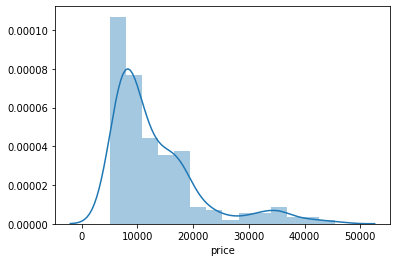

In [14]:
sns.distplot(df['price'])

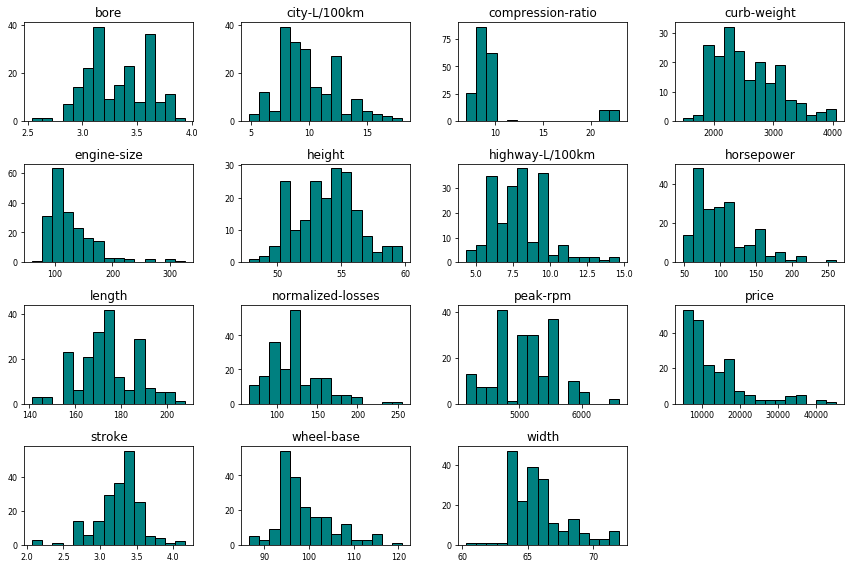

In [15]:
df[["normalized-losses", "wheel-base", "length","width","height","curb-weight", "engine-size","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-L/100km","highway-L/100km","price"]].hist(bins=15, color='teal', edgecolor='black', linewidth=1.0,
           xlabelsize=8, ylabelsize=8, grid=False)
plt.tight_layout(rect=(0, 0, 2, 2))

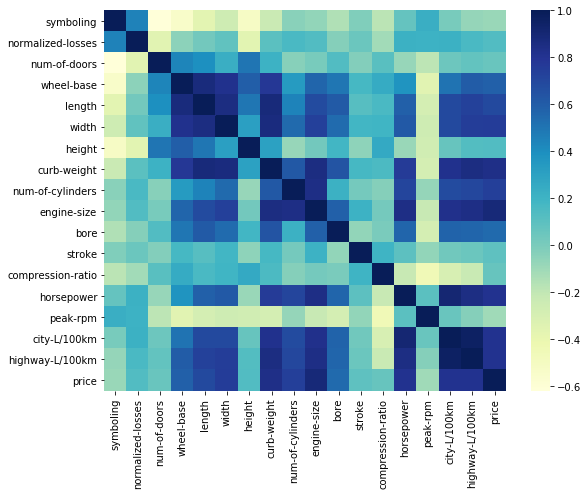

In [16]:
plt.figure(figsize=(9,7))
sns.heatmap(df.corr(), cmap="YlGnBu")

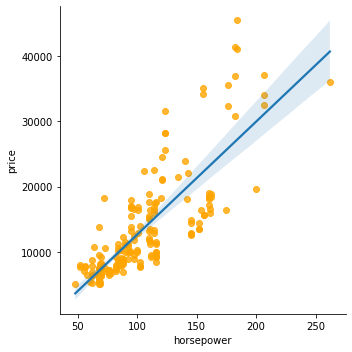

In [17]:
sns.lmplot('horsepower', 'price', df, scatter_kws={'color': 'orange'})

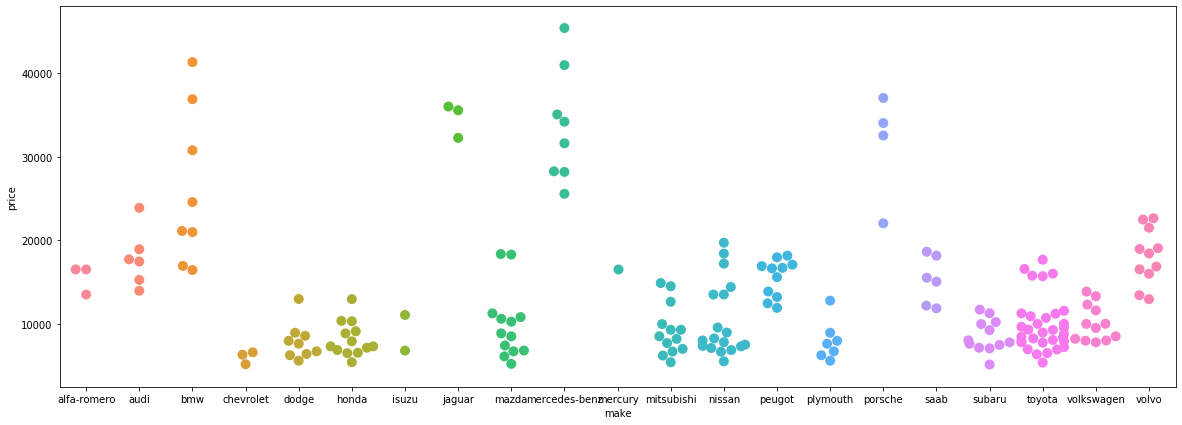

In [28]:
plt.figure(figsize=(20,7))
plt.
sns.swarmplot(df['make'], df['price'], size=10)

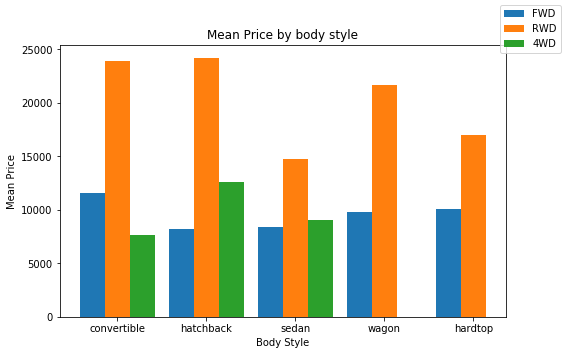

In [59]:
price_means = df[['body-style','drive-wheels','price']].groupby(['body-style', 'drive-wheels'], as_index=True).mean()
body_styles = list(df['body-style'].unique())
xticks = np.arange(len(body_styles)) * 1.25

fwd_means  = list(price_means.loc[(body_styles,['fwd']), 'price'])
rwd_means  = list(price_means.loc[(body_styles,['rwd']), 'price'])
_4wd_means = list(price_means.loc[(body_styles,['4wd']), 'price'])

groupedbar, axes1 = plt.subplots()
rects1 = axes1.bar(xticks - 0.35, fwd_means, 0.35, label='FWD')
rects2 = axes1.bar(xticks, rwd_means, 0.35, label='RWD')
rects3 = axes1.bar(xticks[:3] + 0.35, _4wd_means, 0.35, label='4WD')

axes1.set_ylabel('Mean Price')
axes1.set_xlabel('Body Style')
axes1.set_title('Mean Price by body style')
axes1.set_xticks(xticks)
axes1.set_xticklabels(body_styles)
groupedbar.set_figwidth(8)
groupedbar.set_figheight(5)
groupedbar.legend()

## Data Modelling

In [70]:
# import machine learning library
from sklearn.model_selection import train_test_split
# import stats library
from scipy.stats import pearsonr

In [71]:
# Calculate a Pearson correlation coefficient and the p-value for testing non-correlation
pearsonr(df['horsepower'], df['price'])

(0.8110268356667201, 8.142858884933839e-47)

* The correlation coefficient of 0.81 shows a strong positive correlation
* The p-value (probabilty of our data being uncorrelated): 1.189e-47 shows a low probability

In [72]:
# split dataset into training data and test data: 75% / 25%
train, test = train_test_split(df, test_size=0.25)

In [73]:
from sklearn import linear_model
model = linear_model.LinearRegression()
# reshape first array to 2D for .fit() method
training_x = np.array(train['horsepower']).reshape(-1, 1)
training_y = np.array(train['price'])

# perform linear fit/regression
model.fit(training_x, training_y)
# turn coefficient array which contains only one number into a number
slope = np.asscalar(np.squeeze(model.coef_))
intercept = model.intercept_
print('slope: ', slope, 'intercept: ', intercept)

slope:  184.63321055801288 intercept:  -5564.82950286827


C:\Users\Admin\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  # Remove the CWD from sys.path while we load stuff.


In [74]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# define a function to generate a prediction and then compare the desired metrics
def predict_metrics(lr, x, y):
    pred = lr.predict(x)
    mae = mean_absolute_error(y, pred)
    mse = mean_squared_error(y, pred)
    r2 = r2_score(y, pred)
    return mae, mse, r2

training_mae, training_mse, training_r2 = predict_metrics(model, training_x, training_y)

# calculate with test data for comparison
test_x = np.array(test['horsepower']).reshape(-1, 1)
test_y = np.array(test['price'])
test_mae, test_mse, test_r2 = predict_metrics(model, test_x, test_y)

print('training mean error: ', training_mae, 'training mse: ', training_mse, 'training r2: ', training_r2)
print('test mean error: ', test_mae, 'test mse: ', test_mse, 'test r2: ', test_r2)

training mean error:  3383.1440281647447 training mse:  23072353.629736025 training r2:  0.6759496693919138
test mean error:  3472.466263980608 test mse:  20286363.069279745 test r2:  0.547397896723077


Adding more features to model

In [75]:
cols = ['horsepower', 'engine-size', 'peak-rpm', 'length', 'width', 'height']
for col in cols:
    print(col, pearsonr(df[col], df['price']))

horsepower (0.8110268356667201, 8.142858884933839e-47)
engine-size (0.888942256912904, 2.2892976089488224e-67)
peak-rpm (-0.10433339530640255, 0.1466312116184166)
length (0.6953308343938744, 1.6848664050038481e-29)
width (0.7542733859108733, 4.106033094148679e-37)
height (0.13829068882904821, 0.053857306547437096)


In [76]:
# drop peak-rpm & height from further analysis as they are weakly correlated

# split data into train & test set
model_cols = ['horsepower', 'engine-size', 'length', 'width']
multi_x = np.column_stack(tuple(df[col] for col in model_cols))
multi_train_x, multi_test_x, multi_train_y, multi_test_y = train_test_split(multi_x, df['price'], test_size=0.25)

In [77]:
# fit the model
multi_model = linear_model.LinearRegression()
multi_model.fit(multi_train_x, multi_train_y)
multi_intercept = multi_model.intercept_
multi_coeffs = dict(zip(model_cols, multi_model.coef_))
print('intercept: ', multi_intercept)
print('coefficients: ', multi_coeffs)

intercept:  -50375.444448259244
coefficients:  {'horsepower': 49.44973197316956, 'engine-size': 103.55091700573205, 'length': 36.859966766042525, 'width': 591.1033146389933}


Calculating error metrics.

In [78]:
multi_train_mae, multi_train_mse, multi_train_r2 = predict_metrics(multi_model, multi_train_x, multi_train_y)
multi_test_mae, multi_test_mse, multi_test_r2 = predict_metrics(multi_model, multi_test_x, multi_test_y)

print('training mean error: ', multi_train_mae, 'training mse: ', multi_train_mse, 'training r2: ', multi_train_r2)
print('test mean error: ', multi_test_mae, 'test mse: ', multi_test_mse, 'test r2: ', multi_test_r2)

training mean error:  2500.8876678390375 training mse:  12731010.72398181 training r2:  0.8106972530923493
test mean error:  1992.7962705221735 test mse:  7230321.9741760325 test r2:  0.8665149683838214
